In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
data=pd.read_csv('maladie_observations.csv')
data.head(4)

,temperature,pouls,oxygene,glycemie,tension,label
0,39.087106,97.0,93.374152,98.375664,95,1
1,39.866910,113.0,92.930052,99.497602,105,1
2,39.288298,99.0,92.628848,117.097201,133,1
3,37.283112,77.0,99.541285,105.984670,103,0


In [192]:
data.columns

Index(['temperature', 'pouls', 'oxygene', 'glycemie', 'tension', 'label'], dtype='object')

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5725 entries, 0 to 5724
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  5706 non-null   float64
 1   pouls        5702 non-null   float64
 2   oxygene      5715 non-null   float64
 3   glycemie     5725 non-null   float64
 4   tension      5725 non-null   int64  
 5   label        5725 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 268.5 KB


In [194]:
data.describe()

,temperature,pouls,oxygene,glycemie,tension,label
count,5706.000000,5702.000000,5715.000000,5725.000000,5725.000000,5725.000000
mean,38.518146,88.071773,97.948465,94.679671,114.424629,0.554410
std,14.472846,30.605817,21.843684,14.388183,14.483579,0.497074
min,36.000615,50.000000,92.000184,70.013976,90.000000,0.000000
25%,36.854110,66.000000,94.693446,82.281469,102.000000,0.000000
50%,38.179327,93.000000,97.386048,94.318157,114.000000,1.000000
75%,39.089746,106.000000,98.845349,107.141442,127.000000,1.000000
max,522.520254,591.064218,597.940421,119.984205,139.000000,1.000000


In [195]:
# Data cleaning
data.dropna(inplace=True)

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5673 entries, 0 to 5724
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  5673 non-null   float64
 1   pouls        5673 non-null   float64
 2   oxygene      5673 non-null   float64
 3   glycemie     5673 non-null   float64
 4   tension      5673 non-null   int64  
 5   label        5673 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 310.2 KB


In [197]:
data.duplicated().sum()

0

In [198]:
data.corr()

,temperature,pouls,oxygene,glycemie,tension,label
temperature,1.000000,0.044620,-0.007170,-0.021616,-0.002652,0.068148
pouls,0.044620,1.000000,-0.061519,-0.006536,0.017632,0.646595
oxygene,-0.007170,-0.061519,1.000000,-0.007085,0.024389,-0.094705
glycemie,-0.021616,-0.006536,-0.007085,1.000000,-0.019901,-0.009756
tension,-0.002652,0.017632,0.024389,-0.019901,1.000000,0.019558
label,0.068148,0.646595,-0.094705,-0.009756,0.019558,1.000000


<Axes: >

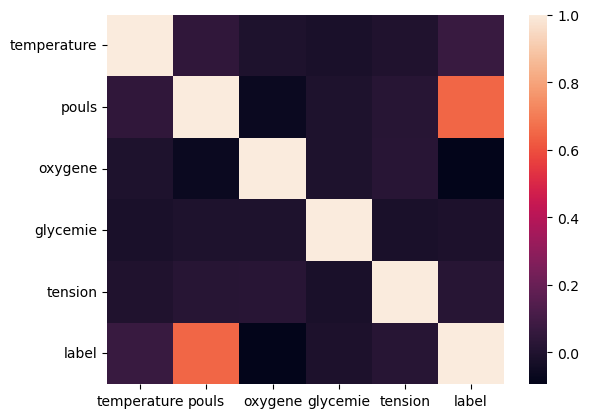

In [199]:
sns.heatmap(data.corr())

Text(0.5, 1.0, 'Pouls mean as function of label')

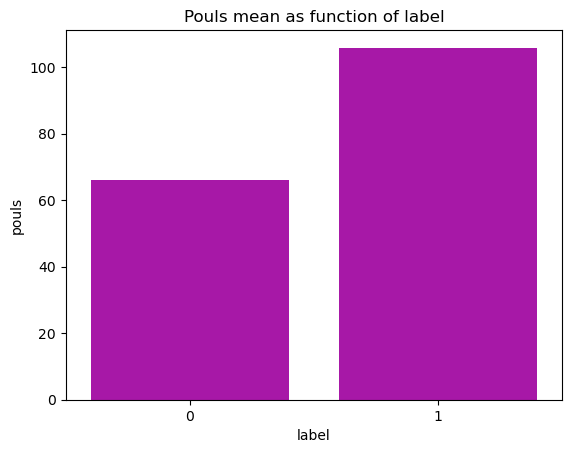

In [200]:
sns.barplot(data.groupby('label')['pouls'].mean(),color='m')
plt.title('Pouls mean as function of label')

Text(0.5, 1.0, 'Temperature mean as function of label')

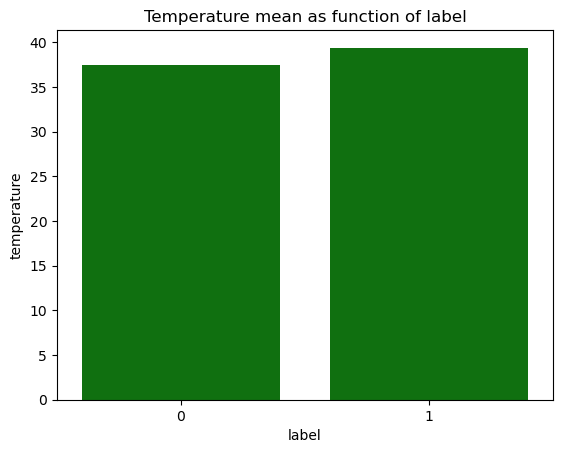

In [201]:
sns.barplot(data.groupby('label')['temperature'].mean(), color='g')
plt.title('Temperature mean as function of label')

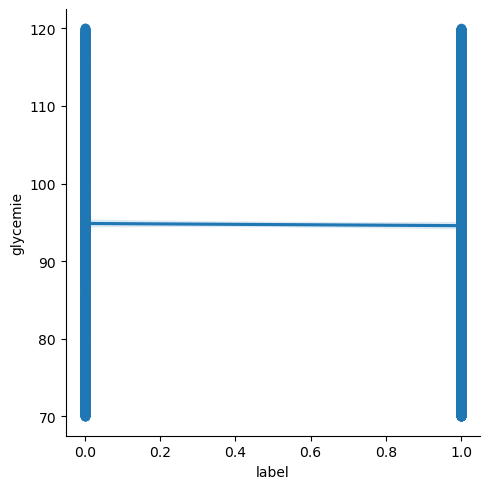

In [202]:
sns.lmplot(x='label',y='glycemie',data=data)

In [203]:
X=data['label']
Y=data[['temperature', 'pouls', 'oxygene', 'glycemie', 'tension']]

In [204]:
from sklearn.model_selection import train_test_split

In [216]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [218]:
x_train.shape

(4538,)

In [220]:
y_train.shape

(4538, 5)

In [272]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

models={'LogisticRegression':LogisticRegression(),
'SVC':SVC(),
'RandomForestClassifier':RandomForestClassifier(),
'DecisionTreeClassifier':DecisionTreeClassifier(),
'Gradient Boosting': GradientBoostingClassifier()
    }

In [278]:
for model_name,model in models.items():
    model.fit(y_train,x_train)
  
    print('After training of the ',model_name,', the score is: ',(model.score(y_train,x_train))*100,'%')

After training of the  LogisticRegression , the score is:  99.7355663287792 %
After training of the  SVC , the score is:  99.8457470251212 %
After training of the  RandomForestClassifier , the score is:  100.0 %
After training of the  DecisionTreeClassifier , the score is:  100.0 %
After training of the  Gradient Boosting , the score is:  100.0 %
